Final weights: [-0.6  0.5 -0.1]


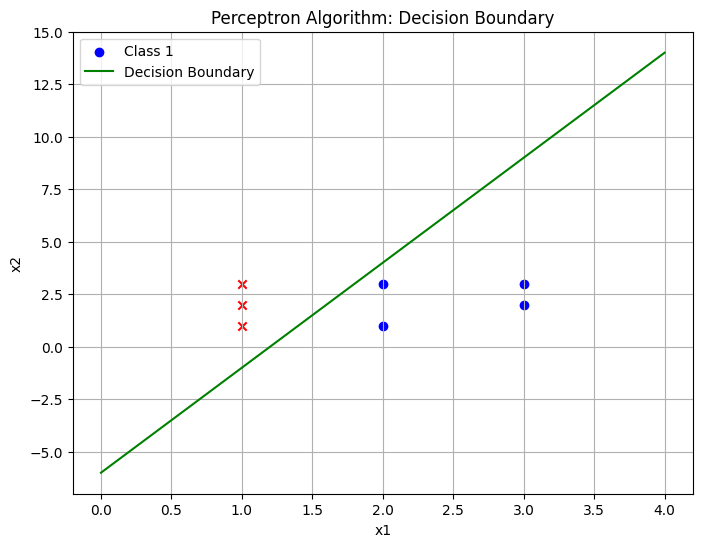

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
# Each point is represented as [x1, x2, label]
data = np.array([
    [2, 3, 1],
    [1, 1, 0],
    [2, 1, 1],
    [3, 3, 1],
    [1, 3, 0],
    [3, 2, 1],
    [1, 2, 0]
])

# Separate features and labels
X = data[:, :2]  # Features (x1, x2)
y = data[:, 2]   # Labels (0 or 1)

# Add a bias term (x0 = 1)
X = np.c_[np.ones(X.shape[0]), X]

# Perceptron parameters
weights = np.zeros(X.shape[1])  # Initialize weights to 0
learning_rate = 0.1
epochs = 10

# Perceptron training
for epoch in range(epochs):
    for i in range(len(X)):
        # Calculate the prediction (dot product)
        prediction = 1 if np.dot(weights, X[i]) > 0 else 0
        # Update weights if prediction is wrong
        weights += learning_rate * (y[i] - prediction) * X[i]

# Display the learned weights
print("Final weights:", weights)

# Plotting the dataset and decision boundary
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(8, 6))
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i, 1], X[i, 2], color='blue', marker='o', label='Class 1' if i == 0 else "")
        else:
            plt.scatter(X[i, 1], X[i, 2], color='red', marker='x', label='Class 0' if i == 0 else "")

    # Decision boundary: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1) / w2
    x1_vals = np.linspace(0, 4, 100)
    x2_vals = -(weights[0] + weights[1] * x1_vals) / weights[2]
    plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Perceptron Algorithm: Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, weights)

In [2]:
import numpy as np
dataset = np.array([
    [2, 3, 1],  # Point (2, 3) belongs to class 1
    [1, 1, -1], # Point (1, 1) belongs to class -1
    [4, 5, 1],  # Point (4, 5) belongs to class 1
    [1, 0, -1], # Point (1, 0) belongs to class -1
])
X = dataset[:, :-1]  # Features
y = dataset[:, -1]   # Labels

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0

# Define the learning rate and number of epochs
learning_rate = 0.1
epochs = 10

# Perceptron training algorithm
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    for i in range(len(X)):
        # Compute the linear combination
        linear_output = np.dot(X[i], weights) + bias
        # Apply the step function
        prediction = 1 if linear_output >= 0 else -1
        # Update weights and bias if the prediction is wrong
        if prediction != y[i]:
            weights += learning_rate * y[i] * X[i]
            bias += learning_rate * y[i]
            print(f"Updated weights: {weights}, Updated bias: {bias}")
    print()

# Print final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)

# Prediction function
def predict(point):
    linear_output = np.dot(point, weights) + bias
    return 1 if linear_output >= 0 else -1

# Test the perceptron
test_points = np.array([[2, 2], [3, 4], [0, 1]])
predictions = [predict(point) for point in test_points]
print("Predictions for test points:", predictions)

Epoch 1
Updated weights: [-0.1 -0.1], Updated bias: -0.1
Updated weights: [0.3 0.4], Updated bias: 0.0
Updated weights: [0.2 0.4], Updated bias: -0.1

Epoch 2
Updated weights: [0.1 0.3], Updated bias: -0.2

Epoch 3
Updated weights: [2.77555756e-17 2.00000000e-01], Updated bias: -0.30000000000000004

Epoch 4

Epoch 5

Epoch 6

Epoch 7

Epoch 8

Epoch 9

Epoch 10

Final weights: [2.77555756e-17 2.00000000e-01]
Final bias: -0.30000000000000004
Predictions for test points: [1, 1, -1]
